## Captcha Recognition

## Introduction
Captcha is a network security framework that is a type of challenge–response test used in computing to determine whether or not the user is humam. Several researches about captcha recognition and related applications were presented one after another to discuss the security for each kind of captcha image.
In this assignment, we try to test the safety of the given set of captcha by trying various methods to recognise the captcha.

## Problem Statement
The given dataset contains 1065 captcha images and each captcha image contains 5 characters which can be a letter or an alphabet. Also, not all the alphabets/numbers are not contained in the dataset.(Characters present are "bcdefgmnpwxy2345678"). Our objective is to split the captcha into the characters and do character recognition. In the end, using the trained model we will trying to predict 5 different captcha images entirely and thereby checking whether this captcha set is safe or not.

## Imports

In [1]:
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



## Data Processing

(50, 200)

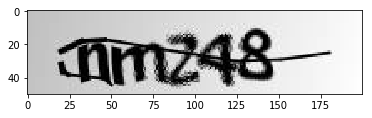

In [2]:
#Load image and convert to grey.
img = io.imread('samples/2cegf.png',as_grey = True)
img = io.imread('samples/2en7g.png',as_grey = True)
img = io.imread('samples/5mnpd.png',as_grey = True)
img = io.imread('samples/nm248.png',as_grey = True)
plt.imshow(img, 'gray')
img.shape

## Thresholding

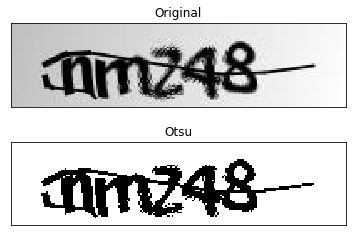

In [3]:
from skimage import filters
from skimage.filters import threshold_otsu
# Otsu thresholding
threshold = threshold_otsu(img)
th3 = img > threshold
#Plot
titles = ['Original', 'Otsu']
images = [img,th3]

for i in range(2):
    plt.subplot(2, 1, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

Then we will try to remove the noise (the line that traverses the image). We will perform Erosions and Dilations (because it is black on white, erosion dilates and dilation erodes). These operation are Morphological Transformations: mathematical operations perfomed on the image's pixels. They will traverse the image with a matrix of nxm (3 by 3 in our case) and multiply the image with it and save the result.

## Dilation

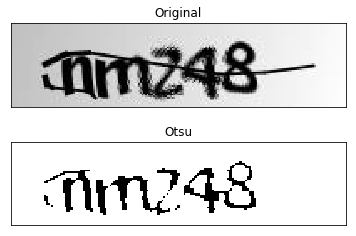

In [4]:
from skimage.morphology import erosion, dilation
kernel = np.ones((3,3), np.uint8)
img_dilation = dilation(th3, kernel)

titles2 = ['Original', 'Otsu']
images2 = [img,img_dilation]

for i in range(2):
    plt.subplot(2, 1, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
plt.show()


## Erosion

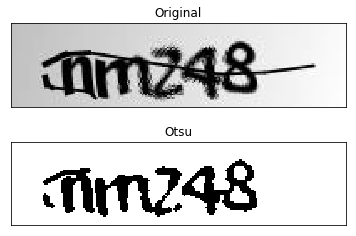

In [5]:
img_erosion = erosion(img_dilation)


titles3 = ['Original', 'Otsu']
images3 = [img, img_erosion]

for i in range(2):
    plt.subplot(2, 1, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
plt.show()


Now we perform a last Morphological Transformations but this time the kernel is 3x1 to reduce the height of the line.

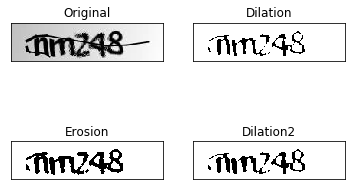

In [6]:
kernel = np.ones((3,1), np.uint8)
img_dilation2 = dilation(img_erosion, kernel)

titles4 = ['Original', 'Dilation', 'Erosion', 'Dilation2']
images4 = [img, img_dilation, img_erosion,img_dilation2]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])


plt.show()


## Exercise



1. Take all the 1065 images in the samples folder, do the above mentioned preprocessing. 
2. Assume that in each captcha image, the first character starts at row = 12 and column = 30. Also assume each character has width of 20 pixels and height of 30 pixels.
 Now, Split each captcha image into 5 character images and form train set and test set. (So the total dataset contains 5325 images (1065*5). Train set should contain 80% of the data.)
3. Now train the dataset using the trainset (of characters) and try to predict the test accuracy. Use <br>
a.Logistic Regression<br>
b.SVM <br>
c.Random Forest  as classifiers. <br>

 i.Which Classifier yields the best accuracy? <br>
 ii.Take the best classifier(a,b or c) and apply hyperparameter selection and try to improve     the accuracy.<br>
 iii.Also find Precision, Recall and F1 score in all cases.<br>
Note: In this sub-question we are doing classification and finding all the metrics for the individual characters.(not the entire captcha).<br>
4. a. Find the confusion matrix using the best classifier.<br>
   b. Which alphabets/numbers have low accuracy? <br>
   c. What is the reason for this? <br>

5. Take the 5 captcha images given in test_samples folder and try to predict the __entire__ captcha in each case. Comment on the results.<br>
6. a. Can you improve the accuracy if we use variable window instead of the fixed window of size 20x38 to split the captcha image into characters?<br>
   b. Try to improve the accuracy using variable window method or any other methods of your choice by keeping classifier(and its parameters) same as before.

In [7]:
img = []
import os

col_dir = 'samples/*.png'
col = io.imread_collection(col_dir)

#for f in os.listdir("samples"):
#    img.append(io.imread(str(f),as_grey = True))
len(col)

1035

In [49]:
import cv2
import glob

imdir = 'samples'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '/*.' + e)) for e in ext]

img = [io.imread(file,as_grey=True) for file in files]
label = [file[8:13] for file in files]
len(img)

1065

In [9]:
from skimage import filters
from skimage.filters import threshold_otsu
# Otsu thresholding
thresh = []
for i in img:
    
    threshold = threshold_otsu(i)
    th3 = i > threshold
    thresh.append(th3)

from skimage.morphology import erosion, dilation
kernel = np.ones((3,3), np.uint8)
img_dilation = []

# dialation
for i in thresh:
    img_dilation.append(dilation(i, kernel))
    
# erosion
kernel = np.ones((3,1), np.uint8)
img_dilation2 = []
for i in img_dilation:
    img_erosion = (erosion(i))
    img_dilation2.append(dilation(img_erosion, kernel))
    

In [10]:
data = []
for x in img_dilation2:
    for i in range(0,5):
        data.append(x[12:42,30+20*i:30+20*(i+1)])
        
len(data)

5325

In [11]:
labels = []
import os
for f in label:
    for i in range(0,5):
        labels.append(f[i])
len(labels)
labels[310]

'c'

In [15]:
from sklearn.model_selection import train_test_split
for i in range(0,len(data)):
    data[i] = data[i].reshape(30*20)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



# Logistic Regression 

In [17]:
import time

start = time.time()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train),lr.score(X_test,y_test))
end = time.time()
print("Time taken", end - start)

/home/tg7797/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


(0.9666666666666667, 0.7173708920187793)
('Time taken', 16.96276092529297)


In [31]:
from sklearn.metrics import classification_report
yfit = lr.predict(X_test)

print(classification_report(y_test, yfit,
                            target_names=set(y_train)))

             precision    recall  f1-score   support

          x       0.83      0.82      0.82        66
          c       0.78      0.75      0.77        57
          b       0.94      0.83      0.88        53
          e       0.81      0.82      0.82        51
          d       0.82      0.61      0.70        66
          g       0.85      0.90      0.87        49
          f       0.65      0.62      0.63        53
          m       0.81      0.71      0.76        42
          p       0.72      0.72      0.72        64
          n       0.72      0.72      0.73        40
          w       0.84      0.81      0.83        47
          3       0.91      0.75      0.82        68
          2       0.75      0.80      0.78        50
          5       0.42      0.47      0.44        57
          4       0.53      0.61      0.57       101
          7       0.71      0.75      0.73        56
          6       0.56      0.53      0.55        43
          y       0.63      0.80      0.71   

# Random Forest Classifier

In [21]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
r.fit(X_train,y_train)
print(r.score(X_train,y_train),r.score(X_test,y_test))
end = time.time()
print("Time taken", end - start)

(0.9974178403755869, 0.8037558685446009)
('Time taken', 0.23921680450439453)


In [32]:
from sklearn.metrics import classification_report
yfit = r.predict(X_test)

print(classification_report(y_test, yfit,
                            target_names=set(y_train)))

             precision    recall  f1-score   support

          x       0.82      0.85      0.84        66
          c       0.77      0.95      0.85        57
          b       0.83      0.83      0.83        53
          e       0.78      0.90      0.84        51
          d       0.83      0.76      0.79        66
          g       0.88      0.90      0.89        49
          f       0.92      0.83      0.87        53
          m       0.80      0.83      0.81        42
          p       0.75      0.81      0.78        64
          n       0.71      0.80      0.75        40
          w       0.78      0.77      0.77        47
          3       0.90      0.76      0.83        68
          2       0.86      0.74      0.80        50
          5       0.70      0.61      0.65        57
          4       0.69      0.75      0.72       101
          7       0.84      0.82      0.83        56
          6       0.81      0.70      0.75        43
          y       0.83      0.89      0.86   

# Support Vector Classification

In [22]:
import time

start = time.time()
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train),svc.score(X_test,y_test))
end = time.time()
print("Time taken", end - start)

(0.8265258215962441, 0.7906103286384977)
('Time taken', 27.560200929641724)


In [33]:
from sklearn.metrics import classification_report
yfit = svc.predict(X_test)

print(classification_report(y_test, yfit,
                            target_names=set(y_train)))

             precision    recall  f1-score   support

          x       0.92      0.82      0.86        66
          c       0.89      0.82      0.85        57
          b       0.88      0.87      0.88        53
          e       0.81      0.90      0.85        51
          d       0.98      0.73      0.83        66
          g       0.75      0.90      0.81        49
          f       0.86      0.79      0.82        53
          m       0.90      0.88      0.89        42
          p       0.72      0.78      0.75        64
          n       0.87      0.68      0.76        40
          w       0.87      0.83      0.85        47
          3       0.90      0.76      0.83        68
          2       0.84      0.82      0.83        50
          5       0.83      0.35      0.49        57
          4       0.56      0.92      0.70       101
          7       0.88      0.75      0.81        56
          6       0.68      0.70      0.69        43
          y       0.65      0.88      0.75   

It can be seen from above that the best test accuracy is observed in Random Forest Classifier. It is also observed that the difference in the training and test set accuracy is quite large in Random Forest Classifier

# Grid Search on Random Forest Classifier

In [41]:
from sklearn.grid_search import GridSearchCV
parameters = {'n_estimators':[5,10,50,100,150,200]}

start = time.time()
gs = GridSearchCV(r, parameters, n_jobs = -1)
gs.fit(X_train,y_train)
end = time.time()
print("Time taken", end-start)
print(gs.best_params_)

('Time taken', 14.171747207641602)
{'n_estimators': 200}


In [43]:
model = gs.best_estimator_
print(model.score(X_train,y_train),model.score(X_test,y_test))

from sklearn.metrics import classification_report
yfit = model.predict(X_test)

print(classification_report(y_test, yfit,
                            target_names=set(y_train)))

(1.0, 0.8610328638497653)
             precision    recall  f1-score   support

          x       0.92      0.91      0.92        66
          c       0.89      0.95      0.92        57
          b       0.91      0.91      0.91        53
          e       0.91      0.94      0.92        51
          d       0.95      0.82      0.88        66
          g       0.89      0.96      0.92        49
          f       0.98      0.91      0.94        53
          m       0.82      0.95      0.88        42
          p       0.84      0.84      0.84        64
          n       0.86      0.78      0.82        40
          w       0.95      0.85      0.90        47
          3       0.89      0.82      0.85        68
          2       0.92      0.90      0.91        50
          5       0.73      0.61      0.67        57
          4       0.67      0.84      0.75       101
          7       0.92      0.86      0.89        56
          6       0.87      0.77      0.81        43
          y       0

It is found that the overall accuracy increases to 0.87 on the application of GridSearch. It is seen that the alphabets: m,p,n and numbers: 4 & 5 have very low accuracy. This is due the fact that they are either wide or long and do not fit properly in the specified window properly. The low accuracy also stems from the fact that they appear very similar to other digits/alphabets

# Test Sample

In [5]:
import cv2
import glob

imdir = 'test_samples'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '/*.' + e)) for e in ext]

img = [io.imread(file,as_grey=True) for file in files]
label = [file[13:18] for file in files]
len(img)

5

In [6]:
from skimage import filters
from skimage.filters import threshold_otsu
# Otsu thresholding
thresh = []
for i in img:
    
    threshold = threshold_otsu(i)
    th3 = i > threshold
    thresh.append(th3)

from skimage.morphology import erosion, dilation
kernel = np.ones((3,3), np.uint8)
img_dilation = []

# dialation
for i in thresh:
    img_dilation.append(dilation(i, kernel))
    
# erosion
kernel = np.ones((3,1), np.uint8)
img_dilation2 = []
for i in img_dilation:
    img_erosion = (erosion(i))
    img_dilation2.append(dilation(img_erosion, kernel))
    
data = []
for x in img_dilation2:
    for i in range(0,5):
        data.append(x[12:42,30+20*i:30+20*(i+1)])
        
len(data)
for i in range(0,len(data)):
    data[i] = data[i].reshape(30*20)


In [64]:
pred_label = []
x = model.predict(data)
for i in range(0,len(data)/len(img)):
    pred = []
    s = ""
    for j in range(0,len(data)/len(img)):
        pred.append(x[5*i+j])
    pred_label.append(s.join(pred))

In [65]:
print(pred_label)
print(label)

['5fyem', '6bxwd', '3ndxd', '8gbn5', '3nfdn']
['5fyem', '6bxwg', '3ndxd', '8gmnx', '3nfdn']


In [67]:
labels = []
import os
for f in label:
    for i in range(0,5):
        labels.append(f[i])

print(model.score(data,labels))

0.88


It is seen that the accuracy on the test set of 5 samples is 0.88. The misclassified letters are predominantly m's, 5's and n's again. 
The accuracy can be improved further by using variable window selection.
In Variable window selection the starting corner as well as the size of the window are determined by finding the gradient contours. Thus, in such a technique we will be able to account for variable heights and widths of letters. 

Thus letters like 'm' and '5' which are disproportionately wider, as well as letters like 'p' which are disproportionately longer will be captured in a proper manner